# Homework #3 - Rossman Store Sales

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import csv
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
trainData = pd.read_csv('train_v2.csv', parse_dates=['Date'], dtype={'StateHoliday': 'str'})
testData = pd.read_csv('test_v2.csv',  parse_dates=['Date'], dtype={'StateHoliday': 'str'})
storeData = pd.read_csv('store.csv')

In [5]:
trainData.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-01-30,5577,616,1,1,0,0
1,2,5,2015-01-30,5919,624,1,1,0,0
2,3,5,2015-01-30,6911,678,1,1,0,0
3,4,5,2015-01-30,13307,1632,1,1,0,0
4,5,5,2015-01-30,5640,617,1,1,0,0


Let's see the correlation between customer and sales

In [9]:
sales_customer = pd.DataFrame()
sales_customer["Sales"] = trainData["Sales"]
sales_customer["Customers"] = trainData["Customers"]
sales_customer.head()

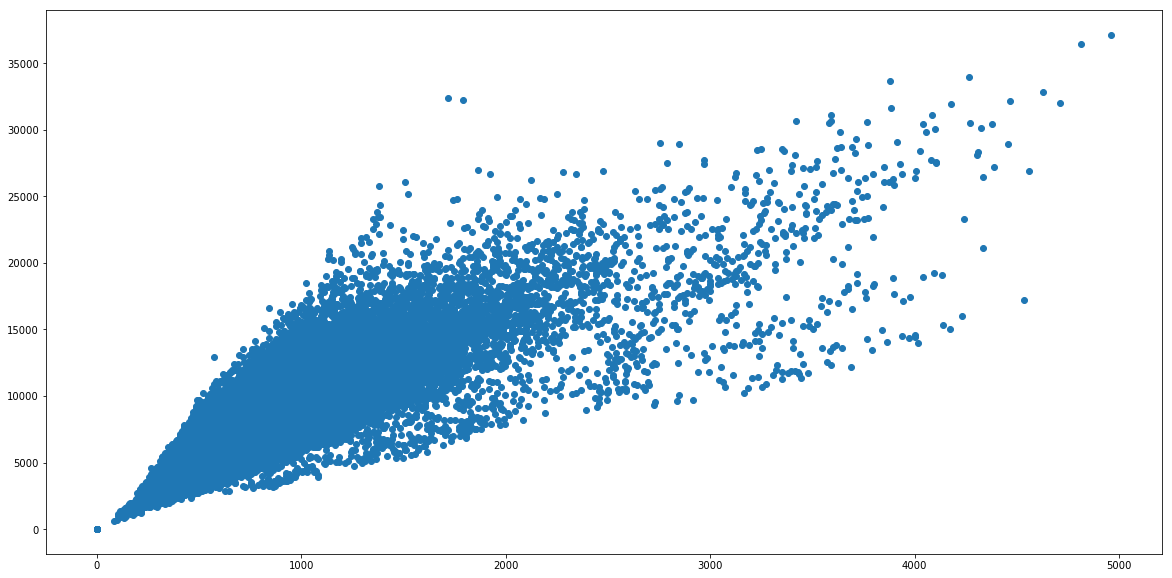

In [32]:
pl.figure(figsize=(20,10))
pl.scatter(sales_customer.Customers, sales_customer.Sales)
pl.show()

This shows that there seems to be a linear relationship between sales and customer, we can use this linear regression to describe this relationship

In [26]:
X = sales_customer.Customers.values.reshape(-1,1)
y = sales_customer.Sales.values.reshape(-1,1)
print(X.shape)
print(y.shape)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
lr = LinearRegression()
clf = lr.fit(X_train, y_train)
print("Cross validation score: " + str(clf.score(X_val, y_val)))
lr.fit(X,y)

(66900, 1)
(66900, 1)
Cross validation score: 0.815140297131


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

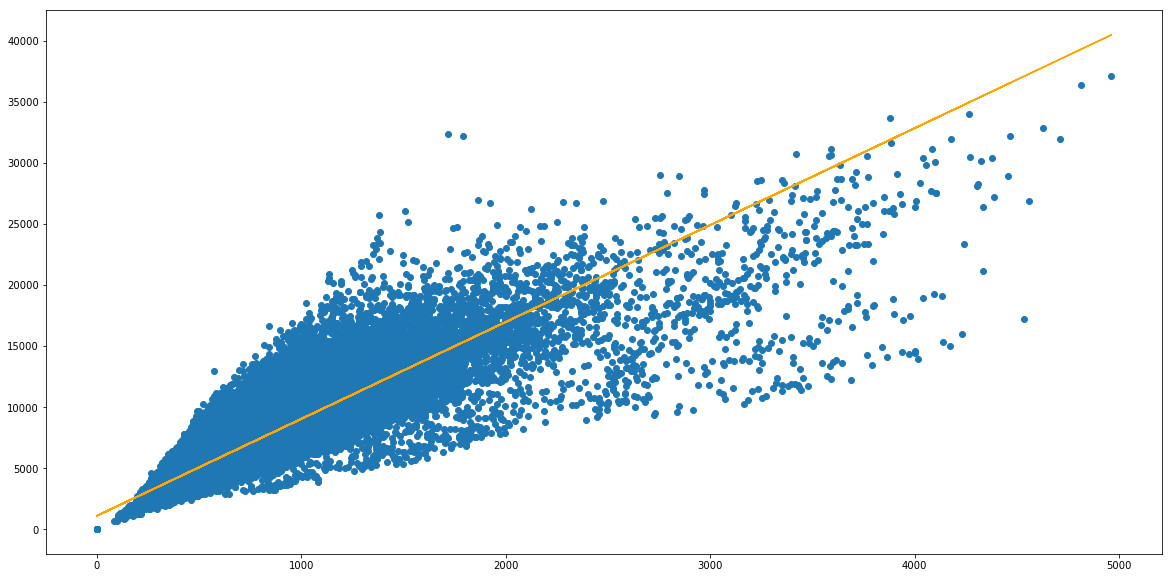

In [33]:
pl.figure(figsize=(20,10))
pl.scatter(X, y)
pl.plot(X, lr.predict(X), c="orange")
pl.show()

In [ ]:
testData 